# Project 4 Sales Prediction


Project Objective :

1. To predict future sales based on historical data
2. To model effect of feature on sale
3. To provide recommnedaton based on analysis leading to business impact

Dataset Description and source : 
The dataset is obtained from kaggle at the following link : https://www.kaggle.com/manjeetsingh/retaildataset
It consists of 3 distinct dataset :
1. Sales dataset : Historical sales data, which covers to 2010-02-05 to 2012-11-01.
2. Stores dataset : Contains additional data related to the store, department, and regional activity for the given dates.
3. Features dataset : Contains additional data related to the store, department, and regional activity for the given dates.

In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
#loading dataset for EDA

sale_data = './Data/sales data-set.csv'
store_data = './data/stores data-set.csv'
feature_data = './data/Features data set.csv'

In [3]:
sales = pd.read_csv(sale_data)
store = pd.read_csv(store_data)
feature = pd.read_csv(feature_data)

# Data Cleaning


In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
#No null value found, Date might need to be changed to datetime format
#Store and Department can also be changed to string as they are categorical features

In [7]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [8]:
# There are negative value in the weekly sales, this require futher investigation

In [9]:
sales[sales.Weekly_Sales<0].count()

Store           1285
Dept            1285
Date            1285
Weekly_Sales    1285
IsHoliday       1285
dtype: int64

In [10]:
#As there are a significant number of negative valued weekly sales, the negative value should not be due to error
#Negative sales value might be due to the return of product being more than the sales of products in that week 

In [11]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [12]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [13]:
store.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [14]:
#No null value and abnormal value in size 

In [15]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [16]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [17]:
feature.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [18]:
# There are multiple columns with null value
# For Markdown column, as the data is anonymized and we do not have any reasonable method to estimate the value 
# We will handle it as 0 for now


In [19]:
feature.MarkDown1 = feature.MarkDown1.fillna(0)
feature.MarkDown2 = feature.MarkDown2.fillna(0)
feature.MarkDown3 = feature.MarkDown3.fillna(0)
feature.MarkDown4 = feature.MarkDown4.fillna(0)
feature.MarkDown5 = feature.MarkDown5.fillna(0)
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       8190 non-null float64
MarkDown2       8190 non-null float64
MarkDown3       8190 non-null float64
MarkDown4       8190 non-null float64
MarkDown5       8190 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [20]:
feature.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,3462.090725,1206.981664,776.464219,1392.763115,2043.403725,172.460809,7.826821
std,12.987966,18.678607,0.431337,7388.916286,5495.556015,7539.953758,4707.111488,9431.223215,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,0.000000,0.000000,0.000000,0.000000,0.000000,132.364839,6.634000
50%,23.000000,60.710000,3.513000,0.000000,0.000000,0.000000,0.000000,0.000000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,4639.585000,98.590000,24.220000,774.692500,2680.295000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [21]:
feature[feature.CPI.isnull() &feature.Unemployment.isnull()].Date.value_counts()

31/05/2013    45
05/07/2013    45
10/05/2013    45
07/06/2013    45
24/05/2013    45
28/06/2013    45
19/07/2013    45
21/06/2013    45
14/06/2013    45
17/05/2013    45
12/07/2013    45
26/07/2013    45
03/05/2013    45
Name: Date, dtype: int64

In [22]:
# As the missing value fro CPI and Unemployment is out of the date range of our sales data no further action need to be taken
# Otherwise a possible way to treat the empty value is to use the anual average for 2013 or from other dataset

# Combining Dataset
Now that the individual dataset is sufficiently cleaned we can proceed to merge the 3 different dataset into a signle datase 

In [23]:
data = pd.merge(sales,store, left_on = 'Store',right_on='Store')

In [24]:
data.shape

(421570, 7)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 7 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 22.9+ MB


In [26]:
data = pd.merge(data,feature, left_on = ['Date','Store','IsHoliday'],right_on=['Date','Store','IsHoliday'])

In [27]:
data.shape

(421570, 16)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [29]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,2,05/02/2010,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
2,1,3,05/02/2010,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
3,1,4,05/02/2010,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
4,1,5,05/02/2010,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [31]:
#Data is clean. Exporting data to a csv for future usage
#data.to_csv('./Data/combined data.csv')

In [32]:
#Converting date to datetime object
#data.Date = pd.to_datetime(data.Date, dayfirst=True)

In [33]:
data.shape

(421570, 16)

In [34]:
data.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [35]:
#As store and Dept are nominal categorical data, it make sense to change the datatype to sting instead of integer

In [36]:
data.Store = data.Store.astype('str')
data.Dept = data.Dept.astype('str')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null object
Dept            421570 non-null object
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(1), object(4)
memory usage: 51.9+ MB


In [38]:
data = pd.get_dummies(data,prefix = 'type',drop_first=True,columns=['Type'])

In [39]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,type_B,type_C
0,1,1,05/02/2010,24924.50,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0
1,1,2,05/02/2010,50605.27,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0
2,1,3,05/02/2010,13740.12,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0
3,1,4,05/02/2010,39954.04,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0
4,1,5,05/02/2010,32229.38,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0


# Linear Regression

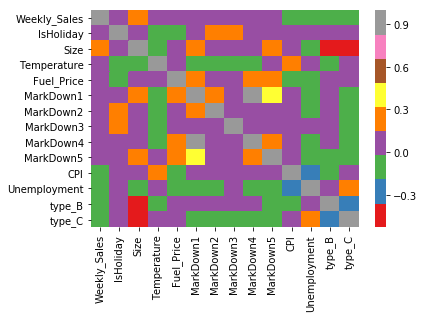

In [40]:
sns.heatmap(data.corr(), cmap='Set1')
#Based on the correlation matrix, the target variable have low correlation with most of the feature
#Linear regression might not give the best model

In [41]:
data.corr()['Weekly_Sales']

Weekly_Sales    1.000000
IsHoliday       0.012774
Size            0.243828
Temperature    -0.002312
Fuel_Price     -0.000120
MarkDown1       0.047172
MarkDown2       0.020716
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown5       0.050465
CPI            -0.020921
Unemployment   -0.025864
type_B         -0.131219
type_C         -0.095388
Name: Weekly_Sales, dtype: float64

In [42]:
#Trying to fit linear regression model with the Size,type and markdown variable

feature_col = ['Size','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','type_B','type_C']

In [43]:
X = data[feature_col]
y = data.Weekly_Sales

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [46]:
lr = LinearRegression(normalize=True)

In [47]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [48]:
list(zip(feature_col, lr.coef_))

[('Size', 0.10105025711712914),
 ('MarkDown1', 0.0007718661164848788),
 ('MarkDown2', 0.009287057866130117),
 ('MarkDown3', 0.11701538366487362),
 ('MarkDown4', 0.023201159733726984),
 ('MarkDown5', 0.06521976634012089),
 ('type_B', 301.1644166555162),
 ('type_C', 3868.229863204447)]

In [49]:
lr.score(X_test,y_test)

0.05988369015901629

In [50]:
pred = lr.predict(X_test)

In [51]:
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

22278.73472639829


In [52]:
data_a = data[np.logical_and(data['type_B'] == 0,data['type_C'] == 0)]
data_b = data[data.type_B == 1]
data_c = data[data.type_C == 1]

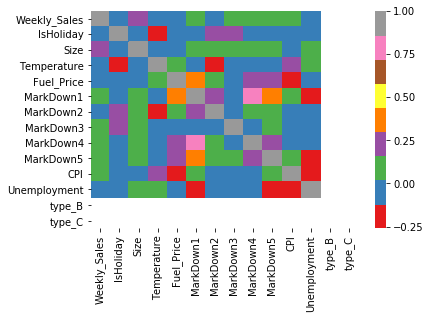

In [53]:
sns.heatmap(data_a.corr(), cmap='Set1')


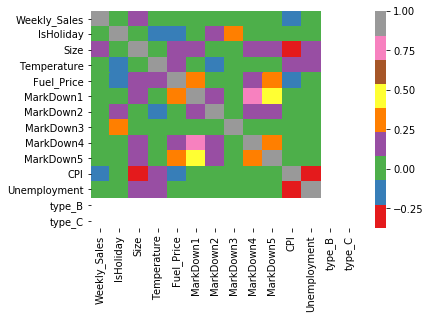

In [54]:
sns.heatmap(data_b.corr(), cmap='Set1')

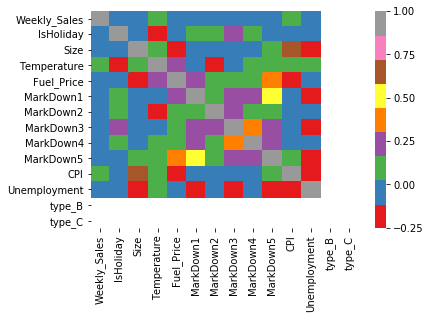

In [55]:
sns.heatmap(data_c.corr(), cmap='Set1')

The low R^2 and high RMSE indicate that this model is a bad fit. Splitting the store into type does not seem to increase the corretlation between weekly sales and feature as well

# Linear Regression Alternative

Trying to fit a model where the Markdown features are altered into ordered categorical value where negative value is marked as -1, null value as 0, positive value as +1

In [56]:
X.loc[X['MarkDown1'] >0, 'MarkDown1'] = 1
X.loc[X['MarkDown1'] <0, 'MarkDown1'] = -1
X.loc[X['MarkDown2'] >0, 'MarkDown2'] = 1
X.loc[X['MarkDown2'] <0, 'MarkDown2'] = -1
X.loc[X['MarkDown3'] >0, 'MarkDown3'] = 1
X.loc[X['MarkDown3'] <0, 'MarkDown3'] = -1
X.loc[X['MarkDown4'] >0, 'MarkDown4'] = 1
X.loc[X['MarkDown4'] <0, 'MarkDown4'] = -1
X.loc[X['MarkDown5'] >0, 'MarkDown5'] = 1
X.loc[X['MarkDown5'] <0, 'MarkDown5'] = -1

C:\Users\Jason\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [57]:
X[X.MarkDown1 >0].head()

,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,type_B,type_C
6587,151315,1.0,1.0,1.0,1.0,1.0,0,0
6588,151315,1.0,1.0,1.0,1.0,1.0,0,0
6589,151315,1.0,1.0,1.0,1.0,1.0,0,0
6590,151315,1.0,1.0,1.0,1.0,1.0,0,0
6591,151315,1.0,1.0,1.0,1.0,1.0,0,0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.05864760189467899

In [59]:
pred = lr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

22293.37623199038


The R^2 score is lower than the previous model, indicating that the magnitude of the Markdown columns have some impact on the actual sales volume. It is then worth revisiting our handling of missing value data for the MarkDown columms if we have further information.

As the Markdown features are anonymised, we are unable to accurately try to fill in the missing value with reasonable value.


# Liner Regression with store and deparment dummy


Buiding regression model for each individual store and department to see if the model will be better fit


In [60]:
#Store level datta have worse correlation than the aggregrated data
data_store_level = data[data.Store == '1']
data_store_level.corr()["Weekly_Sales"]

Weekly_Sales    1.000000
IsHoliday       0.013197
Size                 NaN
Temperature    -0.012877
Fuel_Price      0.011380
MarkDown1       0.018875
MarkDown2      -0.000604
MarkDown3       0.019283
MarkDown4       0.013136
MarkDown5       0.015257
CPI             0.017872
Unemployment   -0.008676
type_B               NaN
type_C               NaN
Name: Weekly_Sales, dtype: float64

In [61]:
#Stronger correlation when compared at department level ; We can consider ftting a linear regression model for each 
# of the individual department
data_dept_level = data[data.Dept == '1']
data_dept_level.corr()["Weekly_Sales"]

Weekly_Sales    1.000000
IsHoliday       0.008922
Size            0.476222
Temperature    -0.273480
Fuel_Price      0.004167
MarkDown1       0.092254
MarkDown2       0.062022
MarkDown3       0.021489
MarkDown4       0.078824
MarkDown5       0.098896
CPI            -0.135564
Unemployment   -0.122064
type_B         -0.063084
type_C         -0.266534
Name: Weekly_Sales, dtype: float64

In [62]:
data_dept_level.shape
#However, there seems to be too little row to run a linear regression 

(6435, 17)

In [63]:
dept_data = pd.get_dummies(data,prefix ='Dept', columns=['Dept'],drop_first= True)

In [64]:
X = dept_data.drop(['Weekly_Sales','Date','Store'], axis = 1)
y = dept_data.Weekly_Sales

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6163301721836302

In [66]:
pred = lr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

14232.413479034703


In [67]:
list(zip(X_test.columns,lr.coef_))

[('IsHoliday', 534.8422062134321),
 ('Size', 0.12346192197652729),
 ('Temperature', 21.52587863032405),
 ('Fuel_Price', -810.286920949268),
 ('MarkDown1', 0.018166496233316877),
 ('MarkDown2', 0.011549975584411615),
 ('MarkDown3', 0.11762254520059341),
 ('MarkDown4', 0.00853153229813559),
 ('MarkDown5', 0.07517643569979157),
 ('CPI', -20.756437616016367),
 ('Unemployment', -395.4965449160186),
 ('type_B', 2081.5776943361657),
 ('type_C', 3064.681058663504),
 ('Dept_10', -998.0890027268381),
 ('Dept_11', -4683.566623635451),
 ('Dept_12', -15077.429954995014),
 ('Dept_13', 11334.59725291567),
 ('Dept_14', -4352.607151466525),
 ('Dept_16', -5004.378095826868),
 ('Dept_17', -9153.416590188579),
 ('Dept_18', -12385.76774876837),
 ('Dept_19', -19959.639136361035),
 ('Dept_2', 24558.48993189153),
 ('Dept_20', -14328.043133149517),
 ('Dept_21', -14256.88518514863),
 ('Dept_22', -10092.08881259949),
 ('Dept_23', 3514.524748282754),
 ('Dept_24', -14792.127168751766),
 ('Dept_25', -10359.34111148

The R^2 and RMSE have both been significantly improved by using dummy value for deparment. However, due to the number of features in this model, it is likely to overfit the data. Will try regularization model

In [68]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [69]:
ridgereg = Ridge(normalize= True)
lassoreg = Lasso(normalize = True)

In [70]:
ridgereg.fit(X_train,y_train)
ridgereg.score(X_test,y_test)

0.45747279108139993

In [71]:
pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

16924.291257962363


In [72]:
list(zip(X_test.columns,ridgereg.coef_))

[('IsHoliday', 305.1252482473854),
 ('Size', 0.0419613123057448),
 ('Temperature', 3.4648822561467134),
 ('Fuel_Price', -215.46565194625427),
 ('MarkDown1', 0.03581462224616692),
 ('MarkDown2', 0.020875988431905534),
 ('MarkDown3', 0.06651916222869032),
 ('MarkDown4', 0.034353431662899496),
 ('MarkDown5', 0.06974611590907626),
 ('CPI', -9.014528183101916),
 ('Unemployment', -125.08122531956175),
 ('type_B', -1925.1832638152327),
 ('type_C', -2605.1180427524937),
 ('Dept_10', 1303.3250112572393),
 ('Dept_11', -536.8793791709047),
 ('Dept_12', -5775.004029042475),
 ('Dept_13', 7487.288955566024),
 ('Dept_14', -405.9887306758208),
 ('Dept_16', -729.0252095277824),
 ('Dept_17', -2808.8729382555634),
 ('Dept_18', -4311.117749895405),
 ('Dept_19', -7591.447161164093),
 ('Dept_2', 14184.039869384507),
 ('Dept_20', -5297.908932552483),
 ('Dept_21', -5380.140508123903),
 ('Dept_22', -2868.7043549090968),
 ('Dept_23', 3905.1697020185975),
 ('Dept_24', -5140.671611389456),
 ('Dept_25', -3378.5015

In [73]:
lassoreg.fit(X_train,y_train)
lassoreg.score(X_test,y_test)

0.5683999874038128

In [74]:
pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

15095.254974389141


In [75]:
list(zip(X_test.columns,lassoreg.coef_))

[('IsHoliday', 0.0),
 ('Size', 0.09310767406205309),
 ('Temperature', 0.0),
 ('Fuel_Price', -0.0),
 ('MarkDown1', 0.0),
 ('MarkDown2', 0.0),
 ('MarkDown3', 0.02313319325841576),
 ('MarkDown4', 0.0),
 ('MarkDown5', 0.0),
 ('CPI', -0.0),
 ('Unemployment', -0.0),
 ('type_B', -0.0),
 ('type_C', 0.0),
 ('Dept_10', 3830.0257438104186),
 ('Dept_11', 177.3170177182001),
 ('Dept_12', -1231.9820187608154),
 ('Dept_13', 16124.14199995537),
 ('Dept_14', 478.9677847788595),
 ('Dept_16', 0.0),
 ('Dept_17', 0.0),
 ('Dept_18', -0.0),
 ('Dept_19', -4536.5714072374885),
 ('Dept_2', 29382.176796679378),
 ('Dept_20', -297.05003391357474),
 ('Dept_21', -393.829822643708),
 ('Dept_22', -0.0),
 ('Dept_23', 8348.484393513134),
 ('Dept_24', -163.04999644171252),
 ('Dept_25', -0.0),
 ('Dept_26', -0.0),
 ('Dept_27', -4676.0788012192315),
 ('Dept_28', -5113.402416810052),
 ('Dept_29', -1029.139902247613),
 ('Dept_3', 0.0),
 ('Dept_30', -2565.2805896288464),
 ('Dept_31', -3406.7593754363165),
 ('Dept_32', -0.0),
 

In [76]:
#This has even higher correlation than just Dept split, however likely due to low number of row;
#Will proceed with fitting model with One hot encoding of both Store and Dept
data_store_dept_level = data[data.Store == '1'][data.Dept == '1']
data_store_dept_level.corr()["Weekly_Sales"]

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Weekly_Sales    1.000000
IsHoliday       0.090061
Size                 NaN
Temperature    -0.473860
Fuel_Price     -0.066396
MarkDown1      -0.003721
MarkDown2       0.044608
MarkDown3      -0.010386
MarkDown4       0.011756
MarkDown5       0.001067
CPI            -0.043533
Unemployment    0.103399
type_B               NaN
type_C               NaN
Name: Weekly_Sales, dtype: float64

In [77]:
store_dept_data = pd.get_dummies(dept_data,prefix = 'Store', columns= ["Store"],drop_first= True)
X = store_dept_data.drop(['Weekly_Sales','Date','Size','type_B','type_C'], axis = 1)
y = store_dept_data.Weekly_Sales

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6481375633614257

In [79]:
pred = lr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

13629.6963875329


In [80]:
list(zip(X_test.columns,lr.coef_))

[('IsHoliday', 522.2428830536325),
 ('Temperature', -10.984160115649598),
 ('Fuel_Price', -682.1740924031308),
 ('MarkDown1', 0.004028467862718457),
 ('MarkDown2', -0.0342510179706075),
 ('MarkDown3', 0.09484080131829338),
 ('MarkDown4', -0.025474573716846735),
 ('MarkDown5', 0.04486354930317735),
 ('CPI', 13.378953670911844),
 ('Unemployment', -392.29439940456865),
 ('Dept_10', -993.6282504480522),
 ('Dept_11', -4695.219873324882),
 ('Dept_12', -15114.939307557177),
 ('Dept_13', 11362.613474160275),
 ('Dept_14', -4375.212014591474),
 ('Dept_16', -5018.6516127081795),
 ('Dept_17', -9106.045946671316),
 ('Dept_18', -12503.706682694072),
 ('Dept_19', -20333.48901945609),
 ('Dept_2', 24550.4564737662),
 ('Dept_20', -14309.203420415422),
 ('Dept_21', -14220.603665249915),
 ('Dept_22', -10128.889981332604),
 ('Dept_23', 3584.792983779168),
 ('Dept_24', -14801.399077294052),
 ('Dept_25', -10368.712721494683),
 ('Dept_26', -12757.73951915187),
 ('Dept_27', -19167.0975818966),
 ('Dept_28', -19

In [81]:
ridgereg = Ridge(normalize= True)
lassoreg = Lasso(normalize = True)

In [82]:
ridgereg.fit(X_train,y_train)
ridgereg.score(X_test,y_test)

0.4777918958264299

In [83]:
pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

16604.336742046056


In [84]:
list(zip(X_test.columns,ridgereg.coef_))

[('IsHoliday', 299.36806803661824),
 ('Temperature', -1.3659312651443871),
 ('Fuel_Price', -293.9568157988261),
 ('MarkDown1', 0.03412747164774423),
 ('MarkDown2', 0.013317714602707696),
 ('MarkDown3', 0.06234673064666811),
 ('MarkDown4', 0.026749891987840287),
 ('MarkDown5', 0.07146951647358098),
 ('CPI', -3.9026131084459483),
 ('Unemployment', -123.24998839668517),
 ('Dept_10', 1291.222849562324),
 ('Dept_11', -551.5064737913818),
 ('Dept_12', -5800.563413092238),
 ('Dept_13', 7481.955169677305),
 ('Dept_14', -421.8460700757035),
 ('Dept_16', -752.7445621232863),
 ('Dept_17', -2808.5637795478647),
 ('Dept_18', -4311.484595038353),
 ('Dept_19', -7630.573718439694),
 ('Dept_2', 14168.113205451142),
 ('Dept_20', -5251.736612729542),
 ('Dept_21', -5388.273221681987),
 ('Dept_22', -2821.187966304455),
 ('Dept_23', 3925.9428983382186),
 ('Dept_24', -5087.369982005469),
 ('Dept_25', -3410.560468467664),
 ('Dept_26', -4276.471991947802),
 ('Dept_27', -7408.956920412288),
 ('Dept_28', -7719.1

In [85]:
lassoreg.fit(X_train,y_train)
lassoreg.score(X_test,y_test)

0.5760250631089952

In [86]:
pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

14961.316862423295


In [87]:
list(zip(X_test.columns,lassoreg.coef_))

[('IsHoliday', 0.0),
 ('Temperature', -0.0),
 ('Fuel_Price', -0.0),
 ('MarkDown1', 0.0),
 ('MarkDown2', 0.0),
 ('MarkDown3', 0.023460423670532672),
 ('MarkDown4', 0.0),
 ('MarkDown5', 0.03582628534900689),
 ('CPI', -0.0),
 ('Unemployment', -0.0),
 ('Dept_10', 3579.5101894647337),
 ('Dept_11', 0.0),
 ('Dept_12', -1499.8003684280254),
 ('Dept_13', 15870.376349020144),
 ('Dept_14', 191.71742091327897),
 ('Dept_16', 0.0),
 ('Dept_17', -0.0),
 ('Dept_18', -0.0),
 ('Dept_19', -4193.582103049545),
 ('Dept_2', 29125.243657407143),
 ('Dept_20', -270.2488069475309),
 ('Dept_21', -631.4396814870867),
 ('Dept_22', -0.0),
 ('Dept_23', 8530.26841036988),
 ('Dept_24', -0.0),
 ('Dept_25', -0.0),
 ('Dept_26', -0.0),
 ('Dept_27', -4413.0548142321495),
 ('Dept_28', -5186.850113595665),
 ('Dept_29', -465.6700476725326),
 ('Dept_3', 0.0),
 ('Dept_30', -2008.8611703110546),
 ('Dept_31', -3522.029133937011),
 ('Dept_32', -0.0),
 ('Dept_33', -0.0),
 ('Dept_34', 0.0),
 ('Dept_35', -3237.6048839518817),
 ('Dept

# Time Series

Attempt at modeling the data using time series

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\Jason\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
data.Date = pd.to_datetime(data.Date, dayfirst=True)
ts_data = data.set_index('Date')
ts_data_all = pd.DataFrame(ts_data.groupby(ts_data.index)['Weekly_Sales'].sum())
ts_data_a = ts_data[np.logical_and(ts_data['type_B'] == 0,ts_data['type_C'] == 0)]
ts_data_a = pd.DataFrame(ts_data_a.groupby(ts_data_a.index)['Weekly_Sales'].sum())
ts_data_b = ts_data[ts_data.type_B == 1]
ts_data_b = pd.DataFrame(ts_data_b.groupby(ts_data_b.index)['Weekly_Sales'].sum())
ts_data_c = ts_data[ts_data.type_C == 1]
ts_data_c = pd.DataFrame(ts_data_c.groupby(ts_data_c.index)['Weekly_Sales'].sum())

In [ ]:
ts_data_all.plot(lw=2.5, figsize=(12,5))

In [ ]:
decomposition = seasonal_decompose(ts_data_all,freq=52)
decomposition.plot()
plt.show()

In [ ]:
#Store Type A
ts_data_a.plot(lw=2.5, figsize=(12,5))

In [ ]:
decomposition = seasonal_decompose(ts_data_a)
decomposition.plot()
plt.show()

In [ ]:
#Store type B
ts_data_b.plot(lw=2.5, figsize=(12,5))

In [ ]:
decomposition = seasonal_decompose(ts_data_b)
decomposition.plot()
plt.show()

In [ ]:
#Store type C
ts_data_c.plot(lw=2.5, figsize=(12,5))

In [ ]:
decomposition = seasonal_decompose(ts_data_c)
decomposition.plot()
plt.show()

Based on the decomposition, we can see that weekly trend seasonality in the sales data across all store type and also an upward trend for store type C. Will proceed to fit time seires model for the data across all store type and individual store type. Theortically could do the same with each individual store and/or deparment.

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_data_all['Weekly_Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_data_a['Weekly_Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_data_b['Weekly_Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_data_c['Weekly_Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Based on the adfuller test result, only the null hypothesis for the type C shop is failed to be rejected. We will need to difference the data before fitting our model. For the other three groups, we can just proceed with ARMA modelling. However, we might need to differnce the data based on seasonality

In [ ]:
import statsmodels.api as sm
import itertools
import warnings

In [ ]:
train = ts_data_all['2010': '2011']
test = ts_data_all['2012']

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
param_list = []
param_seasonal_list = []
AIC_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            param_list += [param]
            param_seasonal_list += [param_seasonal]
            AIC_list += [results.aic]
        except:
            continue
AIC_search = pd.DataFrame({'param' : param_list, 'param_seasonal' : param_seasonal_list, 'AIC': AIC_list})
AIC_search.sort_values(by = 'AIC').head()

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train,order=(0, 1, 1),
                                seasonal_order=(0, 1, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
results.summary()


In [ ]:
#results.predict()

In [ ]:
#y_hat_avg = test.copy()
#y_hat_avg['SARIMA'] = results.predict(start= pd.datetime(2016,1,6).date(), end="26-10-2012", dynamic=True)
#plt.figure(figsize=(16,8))
#plt.plot( train['Weekly_Sales'], label='Train')
#plt.plot(test['Weekly_Sales'], label='Test')
#plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
#plt.legend(loc='best')
#plt.show()

## Above code give error when running ,predict # Will check again at a later time

In [ ]:
train = ts_data_a['2010': '2011']
test = ts_data_a['2012']

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
param_list = []
param_seasonal_list = []
AIC_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            param_list += [param]
            param_seasonal_list += [param_seasonal]
            AIC_list += [results.aic]
        except:
            continue
AIC_search = pd.DataFrame({'param' : param_list, 'param_seasonal' : param_seasonal_list, 'AIC': AIC_list})
AIC_search.sort_values(by = 'AIC').head()

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train,order=(0, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
results.summary()


In [ ]:
train = ts_data_b['2010': '2011']
test = ts_data_b['2012']

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
param_list = []
param_seasonal_list = []
AIC_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            param_list += [param]
            param_seasonal_list += [param_seasonal]
            AIC_list += [results.aic]
        except:
            continue
AIC_search = pd.DataFrame({'param' : param_list, 'param_seasonal' : param_seasonal_list, 'AIC': AIC_list})
AIC_search.sort_values(by = 'AIC').head()

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train,order=(0, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
results.summary()


In [ ]:
train = ts_data_c['2010': '2011']
test = ts_data_c['2012']

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
param_list = []
param_seasonal_list = []
AIC_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            param_list += [param]
            param_seasonal_list += [param_seasonal]
            AIC_list += [results.aic]
        except:
            continue
AIC_search = pd.DataFrame({'param' : param_list, 'param_seasonal' : param_seasonal_list, 'AIC': AIC_list})
AIC_search.sort_values(by = 'AIC').head()

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
results.summary()

# Conclusion

Base on the regularlized linear regression model, the Weekly_Sales is more dependent on the Store and Department rather than any of the other external features.

An alternative for modeling and forecasting would be then to split the dataset based on Store and Department and run each model with the external feature. However, the observation based on that data split would then be too small (~100-200) for model fitting.